In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
solar_data = pd.DataFrame(pd.read_csv('C:/Users/mhkim/OneDrive/문서/GitHub/Solar_Nbody_system/solarsystem.csv', sep=','))
solar_data.set_index('name',inplace=True,drop=True)
solar_data.head()

,distance,velocity,mu
name,,,
sun,0,0,132712440018000000000
mercury,58344000000,47400,22032000000000
venus,108160800000,35100,324859000000000
earth,149600000000,29800,398600441800000
mars,227990400000,24100,42828370000000


In [3]:
#object class part

class Planet:

    def __init__ (self,PlanetName):
        
        __solar_data = pd.DataFrame(pd.read_csv('C:/Users/mhkim/OneDrive/문서/GitHub/Solar_Nbody_system/solarsystem.csv', sep=','))
        __solar_data.set_index('name',inplace=True,drop=True)    
        __pos = np.array([0,0],float)
        __vel = np.array([0,0],float)
        
        self.PlanetName = str(PlanetName)
        
        self.position = __pos+np.array([__solar_data.loc[self.PlanetName][0],0],float) #Nowstate position
        self.velocity = __vel+np.array([0,__solar_data.loc[self.PlanetName][1]],float) #Nowstate velocity
        
        self.mu = float(__solar_data.loc[self.PlanetName][2])
        self.distance = float(__solar_data.loc[self.PlanetName][0]) #Distance from the Sun 
        
    def update (self, new_position, new_velocity):      
        self.position += new_position
        self.velocity += new_velocity

    def info(self):
        print('Planet Name:',self.PlanetName)
        print('Distance From Sun:',self.distance)
        print('Now Coordinate:',self.position)
        print('Now Velocity:',self.velocity)
        print('Planet standard gravitational parameter (mu):',self.mu)

    def __str__(self):
        return ("This is '{0}' ".format(self.PlanetName))

class Solarsystem(list):
    def __init__(self):
        super().__init__
        self.extend(Planet(name) for name in solar_data.index )

    def position(self):
        for i in range(len(self)):
            print (f" {self[i].PlanetName}" , self[i].position)
        

In [9]:
#Calculation function part

def f(m_obj,data,planetindexnumber):
    
    coord = np.split(data,2)[0]
    v = np.split(data,2)[1]
    
    r0 = np.sqrt(np.sum(coord**2))
    
    #next position
    fr = v
    
    #next velocity 
    fv = np.array([0,0],float)

    for z in range(0,len(m_obj)):
        if z == planetindexnumber:
            continue
        else:
            dist = np.sqrt(np.sum((coord - m_obj[z].position)**2))
            if r0<m_obj[z].distance:
                fv += m_obj[z].mu*coord/dist**3
            else:
                fv -= m_obj[z].mu*coord/dist**3

    answer = np.concatenate((fr,fv),axis=None,dtype=float)
    return answer

def update(m_obj,function,h,k):
    data =  np.concatenate((function.position,function.velocity),axis=None, dtype=float)     
    k1 = h * f(m_obj,data,k)
    k2 = h * f(m_obj,data+k1/2,k)
    k3 = h * f(m_obj,data+k2/2,k)
    k4 = h * f(m_obj,data+k3,k)
    newdata = data + (k1+(2*k2)+(2*k3)+k4)/6
    function.update(np.split(newdata,2)[0],np.split(newdata,2)[1])


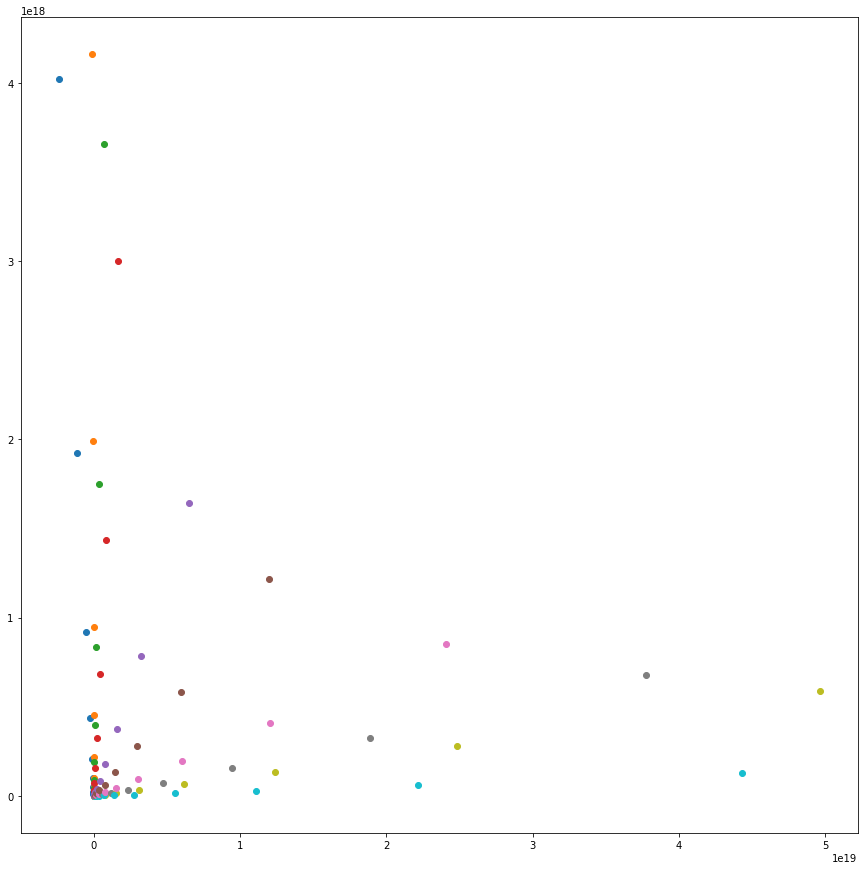

In [7]:
#Main Part
if __name__ == '__main__':
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1, 1, 1)

    solsy = Solarsystem()       #call solarsystem

    t0 = 0
    t_end =  31600000             #initial time setting
    dt = 1.3e6                  #step size
    end = int(t_end/dt)+1
    
    t = t0
    for i in range(end-1):
        dummy = copy.deepcopy(solsy)
        for k in range(1,len(solsy)):

            plt.scatter(solsy[k].position[0],solsy[k].position[1])
            update(dummy,solsy[k],dt,k)
            
        t += dt
    
    plt.show()

    